# Import Libraries

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

# Load Dataset

In [5]:

normal = pd.read_csv('data/ptbdb_normal.csv', header=None)
abnormal = pd.read_csv('data/ptbdb_abnormal.csv', header=None)


In [6]:
normal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
normal.shape

(4046, 188)

In [8]:
abnormal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
abnormal.shape

(10506, 188)

In [10]:

df = pd.concat([normal, abnormal], ignore_index=True)
df = shuffle(df).reset_index(drop=True)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [55]:
df.shape

(14552, 188)

In [12]:
y

array([1., 0., 1., ..., 1., 0., 1.])

In [13]:

df_info = df.info()
missing_values = df.isnull().sum()

missing_columns = missing_values[missing_values > 0]

print("Data types and basic info:")
print(df_info)

print("\nMissing values per column:")
print(missing_values)

print("\nColumns with missing values:")
print(missing_columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 20.9 MB
Data types and basic info:
None

Missing values per column:
0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

Columns with missing values:
Series([], dtype: int64)


In [14]:

unique_values_count = df.nunique()

print("Unique values count per column:")
print(unique_values_count)


Unique values count per column:
0       6906
1      13305
2      14022
3      12751
4      13174
       ...  
183       33
184       15
185       15
186        1
187        2
Length: 188, dtype: int64


In [15]:
column_names = [f'feature_{i}' for i in range(1, df.shape[1])] 
column_names.append('target') 

df.columns = column_names

print(df.head())


   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.880204   0.313509   0.000000   0.122345   0.259133   0.325404   
1   0.978160   0.721126   0.152037   0.014700   0.064679   0.129357   
2   1.000000   0.730392   0.417367   0.137255   0.095238   0.093838   
3   1.000000   0.954230   0.880721   0.904300   0.832178   0.828017   
4   0.951203   0.442612   0.005498   0.085911   0.220619   0.181443   

   feature_7  feature_8  feature_9  feature_10  ...  feature_179  feature_180  \
0   0.382328   0.411215   0.374681    0.400170  ...          0.0          0.0   
1   0.107938   0.104158   0.104158    0.110038  ...          0.0          0.0   
2   0.091036   0.106443   0.111345    0.113445  ...          0.0          0.0   
3   0.789182   0.685160   0.639390    0.556172  ...          0.0          0.0   
4   0.180069   0.181443   0.193814    0.214433  ...          0.0          0.0   

   feature_181  feature_182  feature_183  feature_184  feature_185  \
0          0.0  

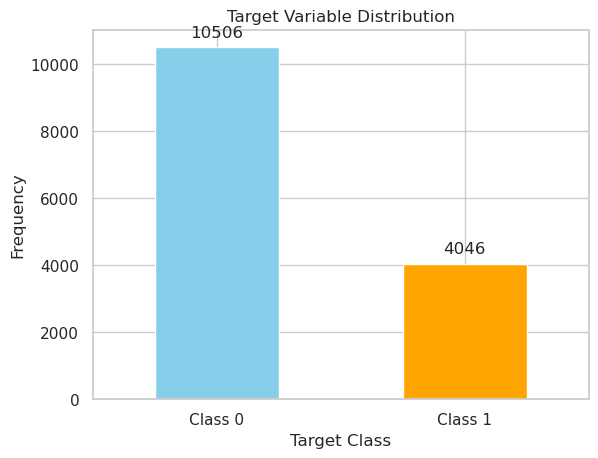

In [57]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
target_counts = df['target'].value_counts()

# Create a bar plot
ax = target_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Set plot titles and labels
plt.title('Target Variable Distribution')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Class 0', 'Class 1'], rotation=0)

# Annotate each bar with its count
for i, count in enumerate(target_counts):
    ax.text(i, count + 0.02 * max(target_counts), str(count), ha='center', va='bottom')

# Display the plot
plt.show()


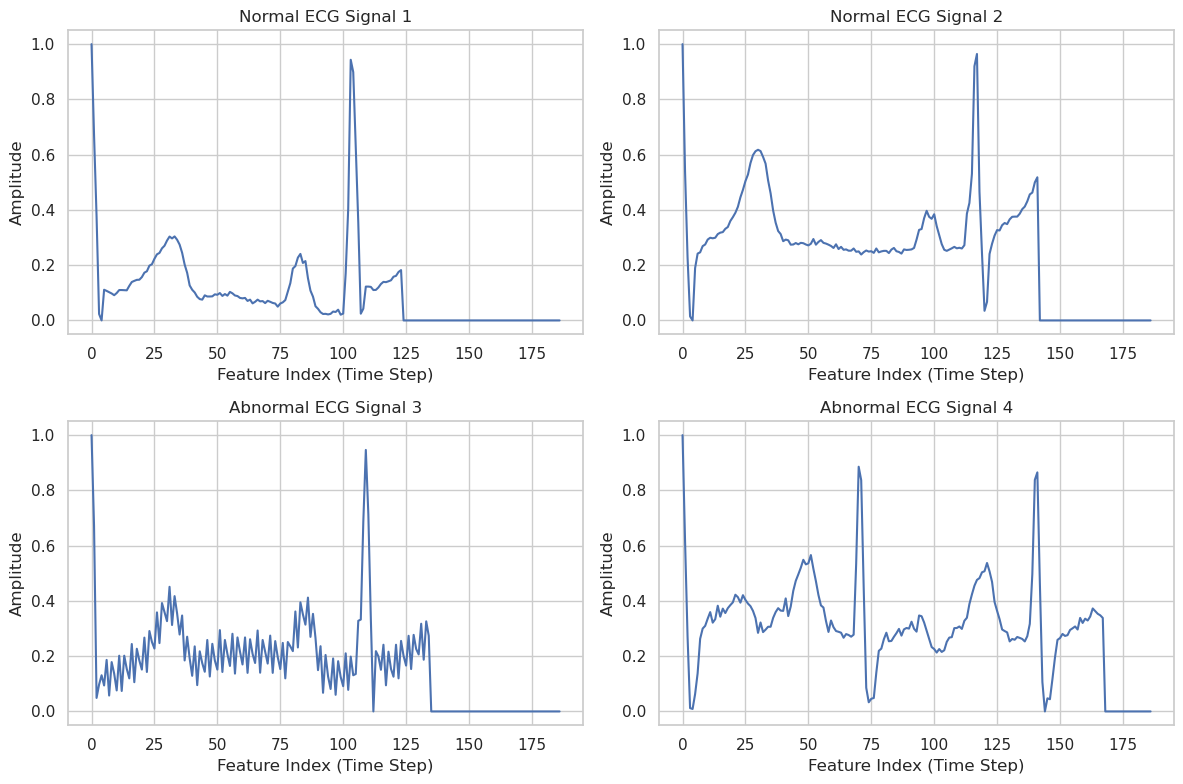

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'target' is the column indicating class labels

# Separate the DataFrame into two based on the target variable
class_0_df = df[df['target'] == 0]
class_1_df = df[df['target'] == 1]

# Randomly select 2 samples from each class
samples_class_0 = class_0_df.drop(columns=['target']).sample(n=2, random_state=42)
samples_class_1 = class_1_df.drop(columns=['target']).sample(n=2, random_state=42)

# Combine the samples
random_samples = pd.concat([samples_class_0, samples_class_1])

# Plotting the selected samples
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, (index, row) in enumerate(random_samples.iterrows()):
    ax = axes[i // 2, i % 2]  # Determine subplot position
    ax.plot(row.values)
    ax.set_title(f'{"Abnormal" if i >= 2 else "Normal"} ECG Signal {i+1}')
    ax.set_xlabel('Feature Index (Time Step)')
    ax.set_ylabel('Amplitude')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [18]:

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# pipelines for multiple ML models

In [20]:
# 1. Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', scaler),
    ('rf', RandomForestClassifier(random_state=42))
])

# 2. SVM Pipeline
svm_pipeline = Pipeline([
    ('scaler', scaler),
    ('svm', SVC(random_state=42))
])

# 3. Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ('scaler', scaler),
    ('lr', LogisticRegression(random_state=42))
])

# 4. XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('scaler', scaler),
    ('xgb', XGBClassifier(random_state=42))
])

# 5. K-Nearest Neighbors Pipeline
knn_pipeline = Pipeline([
    ('scaler', scaler),
    ('knn', KNeighborsClassifier())
])

# 6. Gradient Boosting Pipeline
gbm_pipeline = Pipeline([
    ('scaler', scaler),
    ('gbm', GradientBoostingClassifier(random_state=42))
])

# 7. AdaBoost Pipeline
ada_pipeline = Pipeline([
    ('scaler', scaler),
    ('ada', AdaBoostClassifier(random_state=42))
])

# 8. Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('scaler', scaler),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# 9. CatBoost Pipeline
cat_pipeline = Pipeline([
    ('scaler', scaler),
    ('catboost', CatBoostClassifier(random_state=42, verbose=0))
])

# Store pipelines in a dictionary for easy iteration
pipelines = {
    'Random Forest': rf_pipeline,
    'SVM': svm_pipeline,
    'Logistic Regression': lr_pipeline,
    'XGBoost': xgb_pipeline,
    'KNN': knn_pipeline,
    'Gradient Boosting': gbm_pipeline,
    'AdaBoost': ada_pipeline,
    'Decision Tree': dt_pipeline,
    'CatBoost': cat_pipeline
}

In [21]:
# Dictionary to store results
results = {}

# Hyperparameter tuning using GridSearchCV for each model
# Define hyperparameter grids
param_grids = {
    'Random Forest': {
        'rf__n_estimators': [50, 100, 200],
        'rf__max_depth': [5, 10, 15],
        'rf__min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf'],
        'svm__gamma': ['scale', 'auto']
    },
    'Logistic Regression': {
        'lr__C': [0.1, 1, 10],
        'lr__solver': ['liblinear', 'saga']
    },
    'XGBoost': {
        'xgb__n_estimators': [50, 100, 200],
        'xgb__learning_rate': [0.01, 0.1, 0.2],
        'xgb__max_depth': [3, 5, 7]
    },
    'KNN': {
        'knn__n_neighbors': [3, 5, 7, 10],
        'knn__weights': ['uniform', 'distance']
    },
    'Gradient Boosting': {
        'gbm__n_estimators': [50, 100, 200],
        'gbm__learning_rate': [0.01, 0.1, 0.2],
        'gbm__max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'ada__n_estimators': [50, 100, 200],
        'ada__learning_rate': [0.01, 0.1, 1]
    },
    'Decision Tree': {
        'dt__max_depth': [5, 10, 15],
        'dt__min_samples_split': [2, 5, 10]
    },
    'CatBoost': {
        'catboost__iterations': [50, 100, 200],
        'catboost__learning_rate': [0.01, 0.1],
        'catboost__depth': [3, 5, 7]
    }
}

In [45]:
# Perform GridSearchCV for each model
for name, pipeline in pipelines.items():
    print(f"Training and tuning {name}...")
    
    # Get the corresponding parameter grid for the model
    param_grid = param_grids.get(name, {})
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best score
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")
    
    # Store the best model
    best_model = grid_search.best_estimator_
    
    # Make predictions using the best model
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    

Training and tuning Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'rf__max_depth': 15, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best score for Random Forest: 0.9658957209191149
Training and tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best score for SVM: 0.9530964722407889
Training and tuning Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Logistic Regression: {'lr__C': 1, 'lr__solver': 'liblinear'}
Best score for Logistic Regression: 0.8236402213831578
Training and tuning XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost: {'xgb__learning_rate': 0.2, 'xgb__max_depth': 7, 'xgb__n_estimators': 200}
Best score for XGBoost: 0.9780944065488336
Training and tuning KNN...
Fitting 5 folds for each

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Filter out only the model evaluation entries (i.e., values that are dicts with 'accuracy')
model_results = {k: v for k, v in results.items() if isinstance(v, dict) and 'accuracy' in v}

# Sort by accuracy
best_two = sorted(model_results.items(), key=lambda x: x[1]['accuracy'], reverse=True)[:2]

# Display reports and confusion matrices for top two models
for name, metrics in best_two:
    print(f"Model: {name}")
    print("Classification Report:")
    print(metrics['classification_report'])
    
    # Plot confusion matrix
    cm = metrics['confusion_matrix']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {name}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


NameError: name 'results' is not defined

Epoch 1/50 - Train Loss: 0.6129, Val Loss: 0.5761
Epoch 2/50 - Train Loss: 0.5668, Val Loss: 0.5568
Epoch 3/50 - Train Loss: 0.5474, Val Loss: 0.5326
Epoch 4/50 - Train Loss: 0.5230, Val Loss: 0.5114
Epoch 5/50 - Train Loss: 0.5022, Val Loss: 0.4924
Epoch 6/50 - Train Loss: 0.4880, Val Loss: 0.4794
Epoch 7/50 - Train Loss: 0.4799, Val Loss: 0.4703
Epoch 8/50 - Train Loss: 0.4691, Val Loss: 0.4630
Epoch 9/50 - Train Loss: 0.4628, Val Loss: 0.4561
Epoch 10/50 - Train Loss: 0.4559, Val Loss: 0.4487
Epoch 11/50 - Train Loss: 0.4498, Val Loss: 0.4420
Epoch 12/50 - Train Loss: 0.4411, Val Loss: 0.4437
Epoch 13/50 - Train Loss: 0.4330, Val Loss: 0.4220
Epoch 14/50 - Train Loss: 0.4230, Val Loss: 0.4122
Epoch 15/50 - Train Loss: 0.4096, Val Loss: 0.3978
Epoch 16/50 - Train Loss: 0.3958, Val Loss: 0.3843
Epoch 17/50 - Train Loss: 0.3837, Val Loss: 0.3692
Epoch 18/50 - Train Loss: 0.3680, Val Loss: 0.3576
Epoch 19/50 - Train Loss: 0.3541, Val Loss: 0.3849
Epoch 20/50 - Train Loss: 0.3457, Val Lo

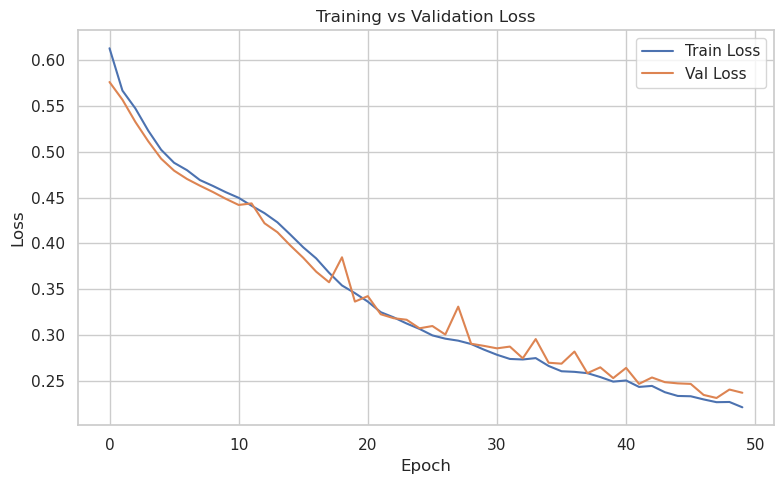

Classification Report:

              precision    recall  f1-score   support

           0     0.8041    0.8819    0.8412       796
           1     0.9539    0.9191    0.9362      2115

    accuracy                         0.9090      2911
   macro avg     0.8790    0.9005    0.8887      2911
weighted avg     0.9129    0.9090    0.9102      2911



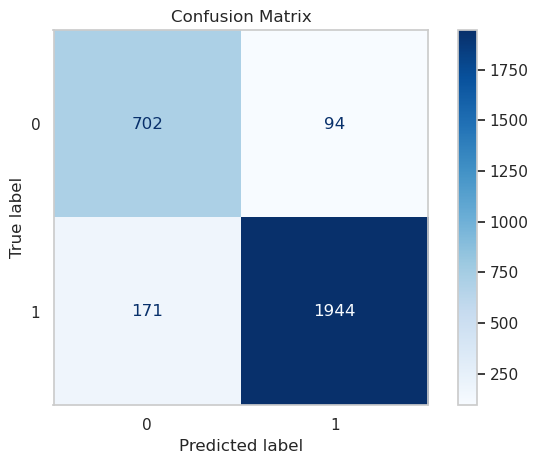

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import numpy as np

# Assume your data is already loaded and split:
# X_train, X_test, y_train, y_test

# Split X_train into training and validation
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train_final.values, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_final.values, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val_final.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create data loaders
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=64)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=64)

# Define CNN v1 model
class CNN_v1(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=7, padding=3)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(32, 64, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool1d(2)

        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool1d(2)

        self.global_pool = nn.AdaptiveMaxPool1d(1)

        self.fc1 = nn.Linear(128, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model and training parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_v1(num_classes=2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

num_epochs = 50
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch)
            loss = criterion(output, y_batch)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# 📈 Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧪 Test Evaluation
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        output = model(X_batch)
        preds = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(y_batch.numpy())

# 📊 Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, digits=4))

# 🔀 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()
